In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("auto-mpg.data-original",delim_whitespace=True,names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [80]:
#try to complete the column with regression later?
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [81]:
df1 = df[~df.isna().any(axis=1)]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [82]:
from sklearn.preprocessing import normalize,PolynomialFeatures

In [89]:
columns = ["cylinders","displacement","horsepower","weight","acceleration","model year","origin"]
X_0 = df1[columns]
X_norm,norms = normalize(X_0,return_norm=True)

poly = PolynomialFeatures(degree=2,interaction_only=False)
X = poly.fit_transform(X_norm)
columns_poly = poly.get_feature_names_out(columns)

y = df1[["mpg"]]
columns_poly


array(['1', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'cylinders^2',
       'cylinders displacement', 'cylinders horsepower',
       'cylinders weight', 'cylinders acceleration',
       'cylinders model year', 'cylinders origin', 'displacement^2',
       'displacement horsepower', 'displacement weight',
       'displacement acceleration', 'displacement model year',
       'displacement origin', 'horsepower^2', 'horsepower weight',
       'horsepower acceleration', 'horsepower model year',
       'horsepower origin', 'weight^2', 'weight acceleration',
       'weight model year', 'weight origin', 'acceleration^2',
       'acceleration model year', 'acceleration origin', 'model year^2',
       'model year origin', 'origin^2'], dtype=object)

In [90]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [95]:
folds=3

lr = LinearRegression()
cv_results = pd.DataFrame(cross_validate(lr,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
cv_results.head()

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.005337,0.007686,-424.0,-10.6,-41.136957,0.855570,-40.447869,0.855751,-37.367782,-2.898103
1,0.005078,0.007492,-11.0,-14.4,0.466586,0.729091,0.655673,0.796826,-4.681040,-4.337686
2,0.004255,0.011153,-19.4,-21.0,-0.113506,-0.548016,-0.053529,0.349108,-7.394515,-7.872042


-13.594625726906534

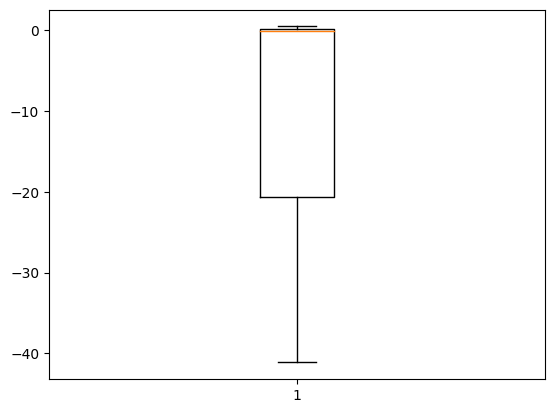

In [98]:
plt.boxplot(cv_results["test_r2"]);
(cv_results["test_r2"]).mean()

In [150]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [100]:
folds = 3

In [101]:
import numpy as np
alphas = np.linspace(0.00000001,0.1,50)
alphas

array([1.00000000e-08, 2.04082612e-03, 4.08164224e-03, 6.12245837e-03,
       8.16327449e-03, 1.02040906e-02, 1.22449067e-02, 1.42857229e-02,
       1.63265390e-02, 1.83673551e-02, 2.04081712e-02, 2.24489873e-02,
       2.44898035e-02, 2.65306196e-02, 2.85714357e-02, 3.06122518e-02,
       3.26530680e-02, 3.46938841e-02, 3.67347002e-02, 3.87755163e-02,
       4.08163324e-02, 4.28571486e-02, 4.48979647e-02, 4.69387808e-02,
       4.89795969e-02, 5.10204131e-02, 5.30612292e-02, 5.51020453e-02,
       5.71428614e-02, 5.91836776e-02, 6.12244937e-02, 6.32653098e-02,
       6.53061259e-02, 6.73469420e-02, 6.93877582e-02, 7.14285743e-02,
       7.34693904e-02, 7.55102065e-02, 7.75510227e-02, 7.95918388e-02,
       8.16326549e-02, 8.36734710e-02, 8.57142871e-02, 8.77551033e-02,
       8.97959194e-02, 9.18367355e-02, 9.38775516e-02, 9.59183678e-02,
       9.79591839e-02, 1.00000000e-01])

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.237e+03, tolerance: 1.518e+00
  model = cd_fast.enet_coordinate_descent(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.096e+02, tolerance: 1.049e+00
  model = cd_fast.enet_coordinate_descent(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+

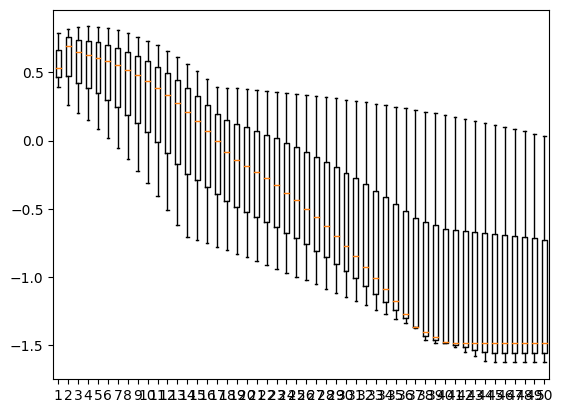

In [102]:
rmse = []
r2 = []
for al in alphas:
    la = Lasso(alpha=al)
    cv = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["test_neg_root_mean_squared_error"])
    r2.append(cv["test_r2"])
plt.boxplot(r2);

In [107]:
la.coef_

AttributeError: 'Lasso' object has no attribute 'coef_'

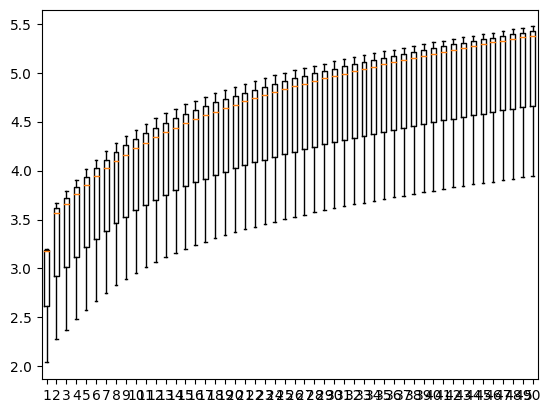

In [109]:
r2 = []
rmse = []
for al in alphas:
    ri = Ridge(alpha=al)
    cv = pd.DataFrame(cross_validate(ri,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))
    rmse.append(-cv["train_neg_root_mean_squared_error"])
    r2.append(cv["train_r2"])
plt.boxplot(rmse);

0.5270945900487579


/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.523e+01, tolerance: 1.813e+00
  model = cd_fast.enet_coordinate_descent(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.807e+00, tolerance: 1.049e+00
  model = cd_fast.enet_coordinate_descent(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+

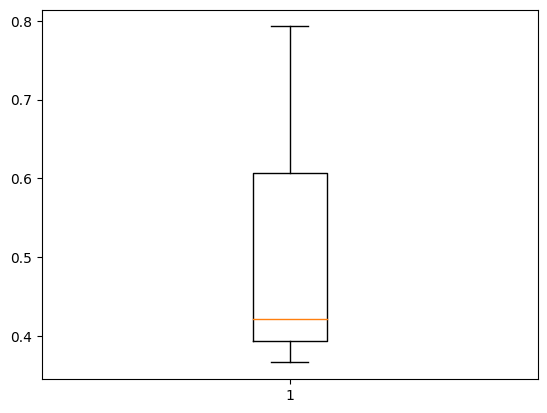

In [111]:
la = Lasso(alpha=0.00001)
cv_la = pd.DataFrame(cross_validate(la,X,y,cv=folds,n_jobs=3,return_train_score=True,scoring=("max_error","r2","explained_variance","neg_root_mean_squared_error")))

plt.boxplot(cv_la["test_r2"]);
print((cv_la["test_r2"]).mean())

In [112]:
cv_la

,fit_time,score_time,test_max_error,train_max_error,test_r2,train_r2,test_explained_variance,train_explained_variance,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.018167,0.009750,-39.676942,-13.632338,0.366756,0.813829,0.473007,0.813829,-4.580905,-3.290346
1,0.015088,0.007222,-8.761417,-13.885764,0.792713,0.841986,0.845678,0.841986,-2.918071,-3.312798
2,0.014349,0.007036,-17.374465,-11.573934,0.421814,0.886071,0.667820,0.886071,-5.328402,-2.135585


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=9)

In [139]:
alphas = np.linspace(0.00000000001,0.01,50)
alphas

array([1.00000000e-11, 2.04081642e-04, 4.08163275e-04, 6.12244907e-04,
       8.16326540e-04, 1.02040817e-03, 1.22448980e-03, 1.42857144e-03,
       1.63265307e-03, 1.83673470e-03, 2.04081633e-03, 2.24489797e-03,
       2.44897960e-03, 2.65306123e-03, 2.85714286e-03, 3.06122450e-03,
       3.26530613e-03, 3.46938776e-03, 3.67346939e-03, 3.87755103e-03,
       4.08163266e-03, 4.28571429e-03, 4.48979592e-03, 4.69387756e-03,
       4.89795919e-03, 5.10204082e-03, 5.30612245e-03, 5.51020409e-03,
       5.71428572e-03, 5.91836735e-03, 6.12244898e-03, 6.32653062e-03,
       6.53061225e-03, 6.73469388e-03, 6.93877551e-03, 7.14285715e-03,
       7.34693878e-03, 7.55102041e-03, 7.75510204e-03, 7.95918368e-03,
       8.16326531e-03, 8.36734694e-03, 8.57142857e-03, 8.77551021e-03,
       8.97959184e-03, 9.18367347e-03, 9.38775510e-03, 9.59183674e-03,
       9.79591837e-03, 1.00000000e-02])

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+03, tolerance: 1.597e+00
  model = cd_fast.enet_coordinate_descent(


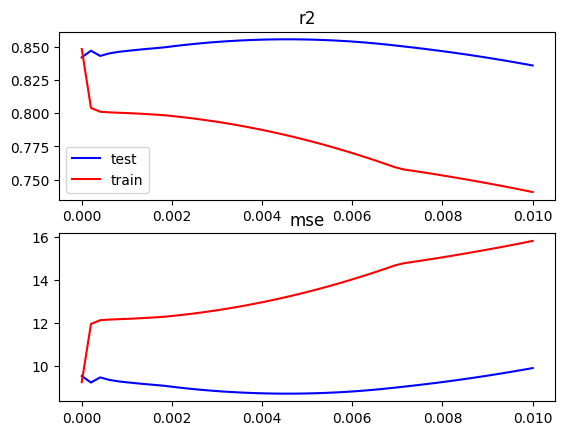

In [140]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_1 = np.sum(np.abs(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Lasso(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.abs(np.concatenate((la.coef_,la.intercept_))))/lr_beta_size_1)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

In [141]:
len(la.coef_)

36

,train_r2,test_r2,test_mse,train_mse,alpha,betas
22,0.783777,0.85554,8.715466,13.181507,0.00449,5.715551e-14


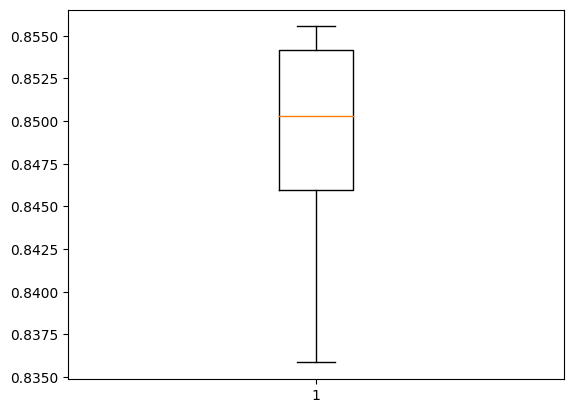

In [142]:
aux = "test_r2" #'test_mse'
plt.boxplot(results[aux]);
results[results[aux] == results[aux].max()]

In [143]:
#origin é 1. American, 2. European, 3. Japanese
la = Lasso(alpha=0.00449)
la.fit(X,y)
for i in range(len(columns_poly)):
    print(f"coef de {list(columns_poly)[i]}:{la.coef_[i]} ")

coef de 1:0.0 
coef de cylinders:-0.0 
coef de displacement:-54.30272951633326 
coef de horsepower:-12.958807046972163 
coef de weight:0.0 
coef de acceleration:0.0 
coef de model year:710.9332863208166 
coef de origin:0.0 
coef de cylinders^2:-0.0 
coef de cylinders displacement:-0.0 
coef de cylinders horsepower:-0.0 
coef de cylinders weight:-0.0 
coef de cylinders acceleration:0.0 
coef de cylinders model year:0.0 
coef de cylinders origin:0.0 
coef de displacement^2:-0.0 
coef de displacement horsepower:-0.0 
coef de displacement weight:-0.0 
coef de displacement acceleration:0.0 
coef de displacement model year:0.0 
coef de displacement origin:0.0 
coef de horsepower^2:-0.0 
coef de horsepower weight:-0.0 
coef de horsepower acceleration:-0.0 
coef de horsepower model year:0.0 
coef de horsepower origin:0.0 
coef de weight^2:0.0 
coef de weight acceleration:0.0 
coef de weight model year:0.0 
coef de weight origin:0.0 
coef de acceleration^2:0.0 
coef de acceleration model year:0

In [144]:
la.intercept_

array([7.58832355])

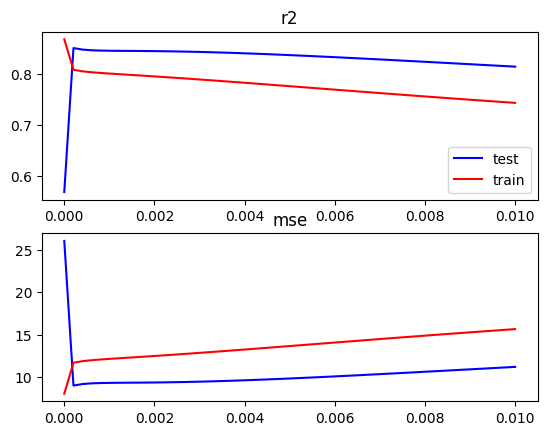

In [145]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_2 = np.sum(np.square(np.concatenate((lr.coef_[0],lr.intercept_))))

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

for al in alphas:
    la = Ridge(alpha=al)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.square(np.concatenate((la.coef_[0],la.intercept_))))/lr_beta_size_2)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend()

,train_r2,test_r2,test_mse,train_mse,alpha,betas
1,0.808013,0.85058,9.014758,11.703995,0.000204,7.424993e-27


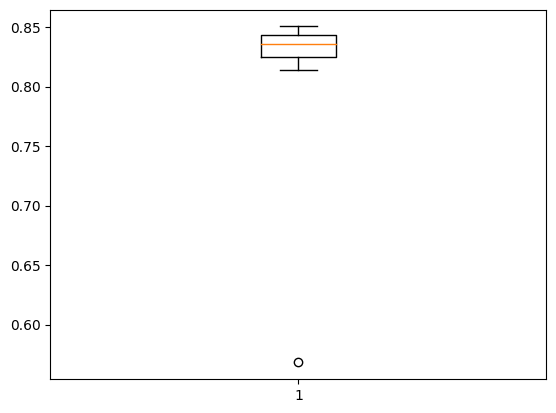

In [148]:
aux = "test_r2" #'test_mse'
plt.boxplot(results[aux]);
results[results[aux] == results[aux].max()]

In [146]:
la.intercept_

array([32.38883979])

In [149]:
#origin é 1. American, 2. European, 3. Japanese
la = Ridge(alpha=0.000204)
la.fit(X,y)
for i in range(len(columns_poly)):
    print(f"coef de {list(columns_poly)[i]}:{la.coef_[0][i]} ")

coef de 1:0.0 
coef de cylinders:-129.66295063110147 
coef de displacement:-23.690170337386263 
coef de horsepower:-125.97565566420863 
coef de weight:-109.35599565388766 
coef de acceleration:-319.0214504034733 
coef de model year:478.66054220192274 
coef de origin:40.85103653010609 
coef de cylinders^2:-0.5108882254316534 
coef de cylinders displacement:-7.507948677067782 
coef de cylinders horsepower:-3.4106527141656673 
coef de cylinders weight:-129.52679763793003 
coef de cylinders acceleration:-1.7355932273274666 
coef de cylinders model year:-3.968939106830918 
coef de cylinders origin:-0.03422048759678164 
coef de displacement^2:151.3182662510891 
coef de displacement horsepower:158.93183266886976 
coef de displacement weight:-49.4475315538146 
coef de displacement acceleration:-41.57264806266482 
coef de displacement model year:-10.691379831172794 
coef de displacement origin:2.3676762037329064 
coef de horsepower^2:48.90458107428586 
coef de horsepower weight:-140.80635049857

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+03, tolerance: 1.597e+00
  model = cd_fast.enet_coordinate_descent(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+03, tolerance: 1.597e+00
  model = cd_fast.enet_coordinate_descent(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.782e+

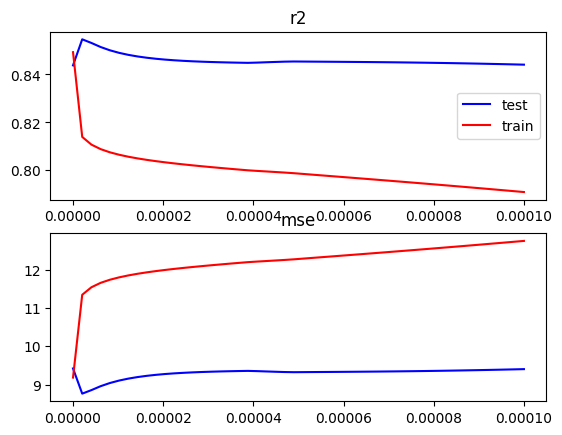

In [164]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_beta_size_2 = np.sum(np.square(np.concatenate((lr.coef_[0],lr.intercept_))))

l1=0.9
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
betas = []

alphas = np.linspace(0.0000000000001,0.0001,50)
alphas

for al in alphas:
    la = ElasticNet(alpha=al,l1_ratio=l1)
    la.fit(X_train,y_train)
    
    y_test_pred = la.predict(X_test)
    y_train_pred= la.predict(X_train)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    betas.append(np.sum(np.square(np.concatenate((la.coef_,la.intercept_))))/lr_beta_size_2)
    
results = pd.DataFrame({"train_r2":train_r2,"test_r2":test_r2,"test_mse":test_mse,"train_mse":train_mse,"alpha":alphas,"betas":betas})
fig, ax = plt.subplots(2)
ax[0].set_title("r2")
ax[0].plot(results["alpha"],results["test_r2"],label="test",color='blue');
ax[0].plot(results["alpha"],results["train_r2"],label="train",color='red');
ax[1].set_title("mse")
ax[1].plot(results["alpha"],results["test_mse"],label="test",color='blue');
ax[1].plot(results["alpha"],results["train_mse"],label="train",color='red');
ax[0].legend();

,train_r2,test_r2,test_mse,train_mse,alpha,betas
1,0.813919,0.85468,8.767363,11.343948,0.000002,2.089959e-26


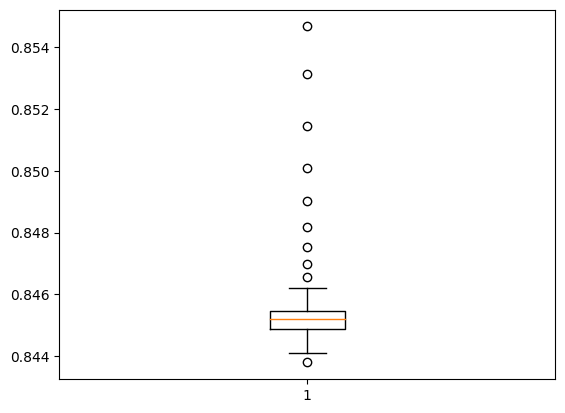

In [165]:
aux = "test_r2" #'test_mse'
plt.boxplot(results[aux]);
results[results[aux] == results[aux].max()]

In [166]:
la = ElasticNet(alpha=0.000002,l1_ratio=l1)
la.fit(X,y)
for i in range(len(columns_poly)):
    print(f"coef de {list(columns_poly)[i]}:{la.coef_[i]} ")

coef de 1:0.0 
coef de cylinders:-268.92141130089493 
coef de displacement:-74.69684524361293 
coef de horsepower:-154.84544358483606 
coef de weight:-168.85389577060943 
coef de acceleration:-432.61891076447984 
coef de model year:527.4668201396224 
coef de origin:75.52537168054556 
coef de cylinders^2:-0.0 
coef de cylinders displacement:-8.770688545678569 
coef de cylinders horsepower:-0.0 
coef de cylinders weight:-268.9467285380652 
coef de cylinders acceleration:-0.0 
coef de cylinders model year:-0.8488130355504351 
coef de cylinders origin:-0.0 
coef de displacement^2:215.67373410983322 
coef de displacement horsepower:349.50977546180246 
coef de displacement weight:-33.442644710999794 
coef de displacement acceleration:-75.91073083208735 
coef de displacement model year:-48.95084729392867 
coef de displacement origin:0.0 
coef de horsepower^2:111.47972844083044 
coef de horsepower weight:-170.70505893845962 
coef de horsepower acceleration:-47.81005611959367 
coef de horsepowe

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+03, tolerance: 2.382e+00
  model = cd_fast.enet_coordinate_descent(


In [167]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

train_r2 = (r2_score(y_train, y_train_pred))
test_r2 =(r2_score(y_test, y_test_pred))

train_mse=(mean_squared_error(y_train, y_train_pred))
test_mse= (mean_squared_error(y_test, y_test_pred))
print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("train_mse:",train_mse)
print("test_mse:",test_mse)



train_r2: 0.8569808536453367
test_r2: -5.9955805031429446
train_mse: 8.71881679389313
test_mse: 422.053923076923


In [168]:
from sklearn.linear_model import RidgeCV,LassoCV

In [170]:
la = LassoCV(cv=3,max_iter=10000,alphas=alphas);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.484155338655, tolerance: 1.51778846743295
  model = cd_fast.enet_coordinate_descent_gram(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.902926224438488, tolerance: 1.51778846743295
  model = cd_fast.enet_coordinate_descent_gram(
/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: Convergenc

0.8341268585050533
4.489795923877551e-05


In [172]:
for i in range(len(columns_poly)):
    print(f"coef de {list(columns_poly)[i]}:{la.coef_[i]} ")

coef de 1:0.0 
coef de cylinders:-666.7808928242408 
coef de displacement:-0.0 
coef de horsepower:-0.0 
coef de weight:-0.0 
coef de acceleration:-200.9994919034394 
coef de model year:707.686779718207 
coef de origin:0.0 
coef de cylinders^2:-0.0 
coef de cylinders displacement:-0.0 
coef de cylinders horsepower:-0.0 
coef de cylinders weight:-0.0 
coef de cylinders acceleration:-0.0 
coef de cylinders model year:-0.0 
coef de cylinders origin:0.0 
coef de displacement^2:0.0 
coef de displacement horsepower:2431.2797681723264 
coef de displacement weight:-120.4221361959913 
coef de displacement acceleration:-0.0 
coef de displacement model year:-0.0 
coef de displacement origin:0.0 
coef de horsepower^2:0.0 
coef de horsepower weight:-438.44762089101954 
coef de horsepower acceleration:-0.0 
coef de horsepower model year:-0.0 
coef de horsepower origin:0.0 
coef de weight^2:-117.71954942470022 
coef de weight acceleration:-798.7244162123411 
coef de weight model year:345.023953045675

In [173]:
ri = RidgeCV(cv=3,alphas=alphas);
ri.fit(X,y);
print(ri.score(X,y))
print(ri.alpha_)

0.835042009312646
1.4285714371428572e-05


In [174]:
la = LassoCV(cv=3,max_iter=10000,verbose=True,selection="cyclic",eps=0.0001);
la.fit(X,y);
print(la.score(X,y))
print(la.alpha_)

/home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.............................................................................................................................................................................................../home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9069877886549875, tolerance: 1.8127332720306522
  model = cd_fast.enet_coordinate_descent_gram(
./home/rick/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not

0.8342596650934004
4.393527358051748e-05


In [175]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr,n_features_to_select="auto",direction="forward",cv=None,n_jobs=3)

sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
lr.fit(X_train_sfs,y_train)

y_test_pred = lr.predict(X_test_sfs)
y_train_pred = lr.predict(X_train_sfs)

train_r2 = (r2_score(y_train, y_train_pred))
test_r2 =(r2_score(y_test, y_test_pred))

train_mse=(mean_squared_error(y_train, y_train_pred))
test_mse= (mean_squared_error(y_test, y_test_pred))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("train_mse:",train_mse)
print("test_mse:",test_mse)
print("n_features:",sfs.n_features_to_select_)
print(sfs.get_feature_names_out(columns_poly))

train_r2: 0.8451137397795211
test_r2: 0.8115561186850297
train_mse: 9.44226672563677
test_mse: 11.369103586627704
n_features: 18
['1' 'cylinders horsepower' 'cylinders acceleration'
 'cylinders model year' 'displacement horsepower' 'displacement origin'
 'horsepower^2' 'horsepower weight' 'horsepower acceleration'
 'weight acceleration' 'weight model year' 'weight origin'
 'acceleration^2' 'acceleration model year' 'acceleration origin'
 'model year^2' 'model year origin' 'origin^2']


In [213]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr,n_features_to_select=5,direction="backward",cv=3,n_jobs=3)

sfs.fit(X_train,y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
lr.fit(X_train_sfs,y_train)

y_test_pred = lr.predict(X_test_sfs)
y_train_pred = lr.predict(X_train_sfs)

train_r2 = (r2_score(y_train, y_train_pred))
test_r2 =(r2_score(y_test, y_test_pred))

train_mse=(mean_squared_error(y_train, y_train_pred))
test_mse= (mean_squared_error(y_test, y_test_pred))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("train_mse:",train_mse)
print("test_mse:",test_mse)
print("n_features:",sfs.n_features_to_select_)
print(sfs.get_feature_names_out(columns_poly))

train_r2: 0.8180260411188065
test_r2: 0.8652646844748564
train_mse: 11.093602843986176
test_mse: 8.12878480475575
n_features: 5
['cylinders' 'horsepower' 'cylinders displacement'
 'displacement acceleration' 'weight model year']


In [194]:
len(sfs.transform(X_train))

262

In [196]:
len(X_train)

262